# Import the Libraries

In [19]:
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the Dataset

In [20]:
iris = datasets.load_iris()
x_d = iris['data']
y_d = iris['target']

print(np.unique(y_d))

[0 1 2]


# Remove the class from dataset

In [21]:
idx=np.where(y_d!=2)
x_d=x_d[idx,:]
y_d=y_d[idx]

x_d=np.reshape(x_d,(np.shape(y_d)[0],4))

# Split the dataset into training and testing using 10 fold

In [22]:
index=np.zeros((1,np.shape(y_d)[0]))
for i in range(0,np.shape(y_d)[0],10):
    index[0,i]=1
    
a,idx=np.where(index==0)
x_train,y_train= x_d[idx,:],y_d[idx]


a,idx=np.where(index==1)
x_test,y_test= x_d[idx,:],y_d[idx]    

# NaiveBayes Algorithm

In [23]:
class NaiveBayes:

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._std = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors =  np.zeros(n_classes, dtype=np.float64)
        
        
        for c in self._classes:
            X_c = X[y==c]
            c = int(c)
            self._mean[c, :] = X_c.mean(axis=0)
            self._std[c, :] = X_c.std(axis=0)
            self._priors[c] = X_c.shape[0] / float(n_samples)

            
    def predict(self, X):
        
        y_pred=[]
        probabilities=[]
        for x in X:
            pred,prosterior=self._predict(x)
            y_pred.append(pred)
            probabilities.append(prosterior)
            
        return np.array(y_pred),probabilities

    def _predict(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = (self._priors[idx])
            
            likelihold=np.prod(self._pdf(idx, x))
            
            posterior = prior * likelihold
            posteriors.append(posterior)
            
        # return class with highest posterior probability
        return self._classes[np.argmax(posteriors)], posteriors
            
    
    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        std = self._std[class_idx]
        numerator = np.exp(- (x-mean)**2 / (2 * std))
        denominator = np.sqrt(2 * np.pi)* std
        return numerator / denominator

# Train the naive bayes model with the training data.

In [24]:
nb = NaiveBayes()
nb.fit(x_train, y_train)

# Test the model with the testing data.

In [25]:
predictions,probabilities = nb.predict(x_test)

# Compute the prediction accuracy by comparing with the target class label 

In [26]:
check=y_test==predictions
unique,counts=np.unique(check,return_counts=True)

accuracy=100*counts/np.shape(y_test)[0]

print('Prediction Accuracy = ',accuracy[0])

Prediction Accuracy =  100.0


# Plot the ROC curve (tp vs fp) true positive vs false positive

In [27]:
probs=np.array(probabilities)[:,1]
fpr,tpr,thresholds=metrics.roc_curve(y_test,probs,pos_label=1)

Text(0.5, 1.0, 'ROC Curve')

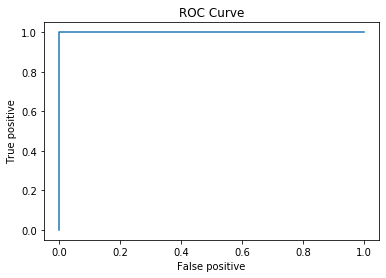

In [28]:
plt.plot(fpr,tpr)
plt.xlabel('False positive')
plt.ylabel('True positive')
plt.title('ROC Curve')

# Print the Probabilities

In [29]:
probabilities

[[4.592875507364657, 8.678417976332399e-07],
 [3.3946060281624457, 1.3918191209109607e-06],
 [3.1708544059118995, 9.917872738488513e-06],
 [3.7121840925989735, 3.2106891384365127e-06],
 [4.385188849814459, 6.894334329391726e-07],
 [2.919423833080903e-18, 0.20572194164501617],
 [1.702424243128028e-07, 0.05797072454092939],
 [2.7761995124803247e-19, 0.3147884063499266],
 [4.598947893300086e-09, 0.4659247849923372],
 [3.6555193174701836e-13, 0.7717506559294005]]